In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
path_city = 'raw_data/city_data.csv'
path_ride = 'raw_data/ride_data.csv'
city_data_df = pd.read_csv(path_city)
ride_data_df = pd.read_csv(path_ride)

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
pyber_data_df = city_data_df.merge(ride_data_df, on='city')
pyber_data_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [6]:
pyber_group = pyber_data_df.groupby('city')
pyber_ride_count = pyber_group.count()
pyber_fare_avg = pyber_group.mean()

In [7]:
pyber_ride_count = pyber_ride_count.loc[:,'ride_id']
pyber_ride_count = pyber_ride_count.to_frame()
pyber_ride_count.rename(columns={'ride_id': 'ride_count'}, inplace=True)
pyber_ride_count

,ride_count
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10
Brandonfort,19
Carriemouth,27
Christopherfurt,27
Colemanland,22


In [8]:
pyber_fare_avg = pyber_fare_avg.loc[:,'fare']
pyber_fare_avg = pyber_fare_avg.to_frame()
pyber_fare_avg.rename(columns={'fare': 'average_fare'}, inplace=True)
pyber_fare_avg

,average_fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000
Brandonfort,35.437368
Carriemouth,28.314444
Christopherfurt,24.501852
Colemanland,30.894545


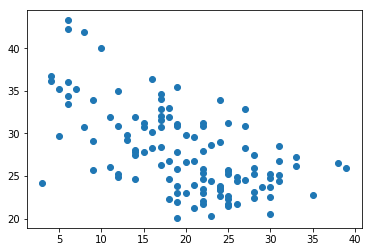

In [11]:
ax1 = plt.subplot()
ax1.scatter(x=pyber_ride_count.iloc[:,0], y=pyber_fare_avg.iloc[:,0])